<a href="https://colab.research.google.com/github/hana-magdy/cartoonifying/blob/main/Cartoonifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import sys
import matplotlib.image as mpimg
  


### Cartoonfying

In [78]:
def Display_Images(image,grey=0):
  if grey == 0:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
  else:
    plt.imshow(image,cmap = "gray")
    plt.axis("off")
    plt.show()




In [91]:
def MedianBlurrig(image,filter_size):
  blurred=cv2.medianBlur(image,filter_size)
  return blurred


In [103]:
def Laplacian_EdgeDetection(image,filter_size):
  
  laplacian=cv2.Laplacian(image,cv2.CV_64F,ksize=filter_size)
  print("Edges detected with filter size = :",filter_size)
  plt.imshow(laplacian,cmap='gray', vmin=0, vmax=255)
  plt.axis("off")
  plt.show()
  
  ret, mask = cv2.threshold(laplacian, 127, 255, cv2.THRESH_BINARY_INV) 
  print("Edges detected after thresholding with filter size = :",filter_size)
  Display_Images(mask,grey=1)
  return mask

In [118]:
def Bilateral_Filter(image,filter_size,sigmaColor, sigmaSpace):
  bilateral = cv2.bilateralFilter(image,filter_size, sigmaColor, sigmaSpace)
  return bilateral

Original Image: 


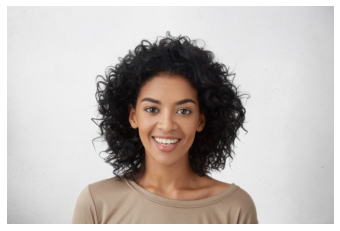

Original Image in grayscale: 


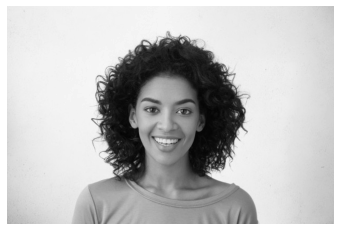

In [89]:
path = r'/content/portrait.jpg'
  
img_BGR = cv2.imread(path)
print("Original Image: ")
Display_Images(img_BGR,grey=0)


gray_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
print("Original Image in grayscale: ")
Display_Images(gray_img,grey=1)


Image blurred with filter size = 7


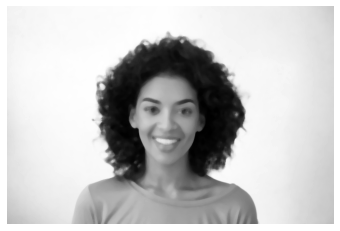

Image blurred with filter size = 5


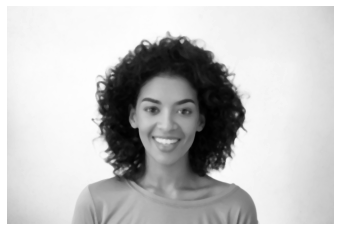

In [95]:
blurred_7=MedianBlurrig(gray_img,7)
print("Image blurred with filter size = 7")
Display_Images(blurred_7,grey=1)

blurred_5=MedianBlurrig(gray_img,5)
print("Image blurred with filter size = 5")
Display_Images(blurred_5,grey=1)


Edges detected with filter size = : 3


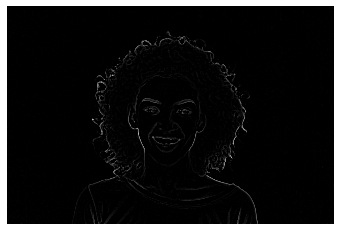

Edges detected after thresholding with filter size = : 3


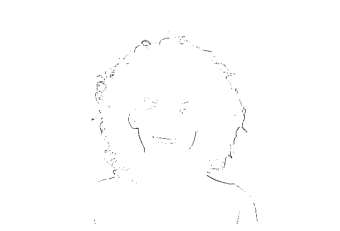

Edges detected with filter size = : 5


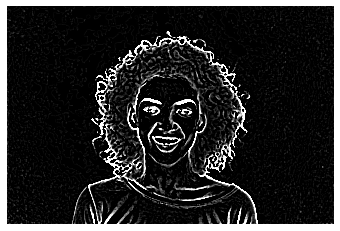

Edges detected after thresholding with filter size = : 5


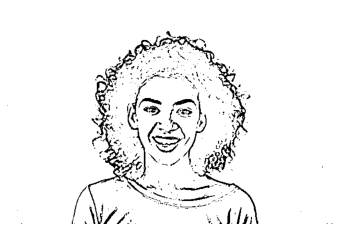

Edges detected with filter size = : 7


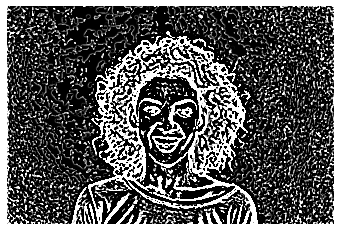

Edges detected after thresholding with filter size = : 7


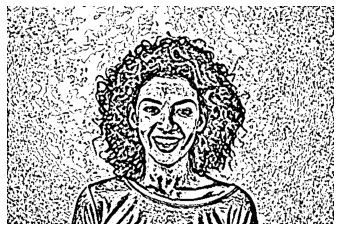

In [105]:
mask3=Laplacian_EdgeDetection(blurred_5,3)

mask5=Laplacian_EdgeDetection(blurred_5,5)

mask7=Laplacian_EdgeDetection(blurred_5,7)

edges_index = np.where(mask5 == 0)

Bilateral filtering of size =15


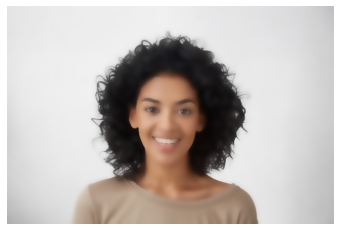

Bilateral filtering of size =5


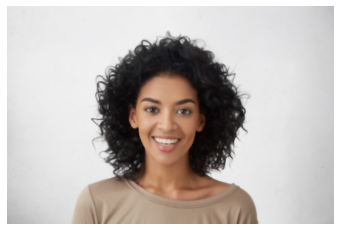

Bilateral filtering of size =5 repeated 4 times


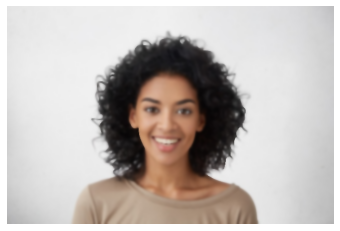

In [139]:
print("Bilateral filtering of size =15")
bilateral_15 = Bilateral_Filter(img_BGR,15, 150,150)
Display_Images(bilateral_15,grey=0)

print("Bilateral filtering of size =5")
bilateral_5 = Bilateral_Filter(img_BGR,5, 150,150)
Display_Images(bilateral_5,grey=0)


bilateral_5x4=bilateral_5
for i in range(0,3):
  bilateral_5x4 = Bilateral_Filter(bilateral_5x4,5, 150,150)

print("Bilateral filtering of size =5 repeated 4 times")
Display_Images(bilateral_5x3,grey=0)







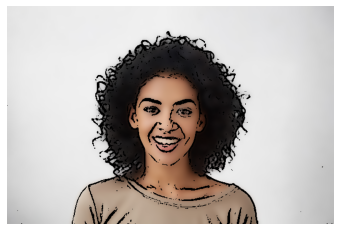

In [141]:
for i in range(len(edges_index[0])):
  bilateral_15[edges_index[0][i]][edges_index[1][i]]=0

Display_Images(bilateral_15,0)


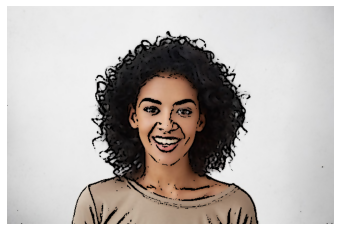

In [140]:
for i in range(len(edges_index[0])):
  bilateral_5[edges_index[0][i]][edges_index[1][i]]=0

Display_Images(bilateral_5,0)

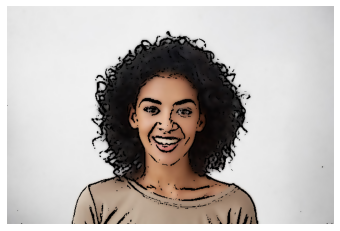

In [142]:
for i in range(len(edges_index[0])):
  bilateral_5x4[edges_index[0][i]][edges_index[1][i]]=0

Display_Images(bilateral_5x4,0)
